# Proyecto 2 NLP - Redes Neuronales

### OBJETIVO : Profundizar y ajustar la resolución del Proyecto 1:
### Proyecto 1 - Programación de Lenguaje Natural (NLP)- Machine Learning

<font color=00777>

## 1 - Elección del proyecto

<font color=00777>

## 2 - Problemática a resolver

<font color=00777>

## 3 - Desarrollo del proyecto
+ Flujo de trabajo del preprocesamiento
+ Carga de librerías generales
+ Carga del dataset
+ Creación del dataset binario
+ Carga de librerías de NLP
+ Selección de las columnas de interés
+ Carga de la librería Keras
+ Vectorización
+ Máxima cantidad de palabras por título
+ Relleno de documentos (Padding)
+ División del dataset

+ Modelo 1 Modelo simple
  - Definición 
  - Entrenamiento con 50 epochs
  - Evaluacion con 50 epochs
  - Entrenamiento con 500 epochs
  - Evalución con 500 epochs
+ Modelo 2 Modelo CNN + Embeding layer
  - Definición
  - Entrenamiento con 50 epochs
  - Evaluación con 50 epochs
  - Entrenamiento con 500 epochs
  - Evaluación con 500 epochs
  - Comparación de la performance de los modelos
  - Gráfico de comparación de los modelos

<font color=00777>

## 4 - Conclusiones
+ Conclusión final
+ Bibliografía

<font color=00777>

# 1 - Elección del proyecto


+ Procesamiento de Lenguaje Natural 
    
  + Objetivo : Implementar un modelo para reconocer el puntaje asignado a un ítem de Amazon a partir de la crítica que hace un/a usuario/a.

  + Dataset: The Multilingual Amazon Reviews Corpus
    
  + Modelo de ML con mejor performance: Random Forest Optimizado


<font color=00777>

# 2 - Problemática a resolver


+ Considerando el mejor modelo de ML de NLP-Proyercto 1 y los nuevos modelos explorados en el presente trabajo, evaluar cuál sería el modelo más adecuado para aplicar en la predicción de puntaje para un item de Amazon.

<font color=00777>

# 3 - Desarrollo del proyecto

<font color=00777>_______________**Elección de modelos**</font> 

 + Se eligen para trabajar la librería Keras y 2 modelos de redes neuronales
    + Modelo 1 - Modelo simple de clasificación binaria
    + Modelo 2 - Modelo de CNN (Redes Neuronales Convulcionales) + Embedding layer (Capa de incrustación)
    

<font color=00777>_______________**Flujo de trabajo del preprocesamiento**</font> 

+ De la misma forma que en el Proyecto 1 : 
+ Se decide que además de la columna de 'stars' que califica el producto y la experiencia de la compra, se trabajará unicamente con la columna 'review_title'. Habiendo inspeccionado los títulos y los comentarios de las experiencia de compra,con cada una de las distintas calificaciones, se llega a la conclusión que el comprador ya hizo mucho trabajo de síntesis al tener que colocar un título antes de ingresar el comentario. Por lo tanto de alguna manera ya adelantó parte del procesamiento que necesitamos hacer, si leemos con detenimiento hay mucho más sentimiento en los títulos que en los comentarios donde el mismo se diluye. 
+ Se transforma el dataset multiclase en binario para obtenr sólo 2 calificaciones: Positiva o Negativa
+ Se reproduce el flujo de trabajo del preprocesamiento del dataset que se utilizó en el Proyecto 1 NLP, con la finalidad que sean comparables los resultados del rendimiento de los modelos.


<font color=00777>_______________**Carga de las librerías**</font> 

 + Se cargan las librerías necesarias para convertir y graficar el dataset multiclase de Amazon en un dataset binario


In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<font color=00777>_______________**Carga del dataset**</font> 

 + Se carga el dataset de entrenamiento

In [2]:
amazon_train = pd.read_json('dataset_es_train.json', lines= True)

<font color=00777>______________**Creación del dataset binario**</font> 
+ Se unificarán los valores de 1 y 2 estrellas como Experiencia Negativa y los de 4 y 5 como Experiencia Positiva.
+ Se eliminarán los valores de 3 estrellas porque no aportan en este análisis.

In [3]:
datasetBinario_train = pd.read_json('dataset_es_train.json', lines= True)

In [4]:
datasetBinario_train = datasetBinario_train.drop(datasetBinario_train[datasetBinario_train['stars']==3].index)

In [5]:
datasetBinario_train['stars']=datasetBinario_train['stars'].replace(1,0)
datasetBinario_train['stars']=datasetBinario_train['stars'].replace(2,0)
datasetBinario_train['stars']=datasetBinario_train['stars'].replace(4,1)
datasetBinario_train['stars']=datasetBinario_train['stars'].replace(5,1)

C:\Users\macer\anaconda3\envs\Proyecto_4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


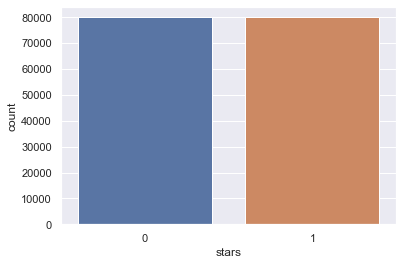

In [6]:
sns.countplot(datasetBinario_train.stars)
plt.show()

In [7]:
datasetBinario_train.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,0,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,0,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,0,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore


<font color=00777>______________**Carga de librerías para  NLP**</font> 
+ Se cargan las librerías necesarias para Procesamiento de Lenguaje Natural (NLP).

In [8]:
import nltk
# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\macer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\macer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\macer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<font color=00777>______________**Lematización**</font> 

In [9]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [10]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplazar caracteres
import re

datasetBinario_train = pd.concat([datasetBinario_train.review_title,datasetBinario_train.stars],axis=1)
datasetBinario_train.dropna(axis=0,inplace=True)

# Traemos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')

In [11]:
Titulos_list=[]
for Titulos in datasetBinario_train.review_title:
    # Vamos a reemplazar los caracteres que no sean letras por espacios
    Titulos=re.sub("[^a-zA-Z]"," ",str(Titulos))
    # Pasamos todo a minúsculas
    Titulos=Titulos.lower()
    # Tokenizamos para separar las palabras
    Titulos=nltk.word_tokenize(Titulos)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in Titulos]
    
    
    #Eliminamos las palabras de menos de 2 letras
    Titulos = [palabra for palabra in Titulos if len(palabra)>1]
    # Sacamos las Stopwords
    Titulos = [palabra for palabra in Titulos if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    Titulos =" ".join(Titulos)
    Titulos_list.append(Titulos)

In [12]:
datasetBinario_train["titular_lemm"] = Titulos_list
datasetBinario_train.tail()

,review_title,stars,titular_lemm
199995,Tal y como se describe,1,tal describe
199996,Funciona perfectamente,1,funciona perfectamente
199997,Buena calidad.,1,buena calidad
199998,Recomendado,1,recomendado
199999,Preciosas,1,preciosas


<font color=00777>______________**Selección de las columnas de interés**</font> 
+ Se toman del dataset las columnas 'review_title' y 'stars'

In [13]:
datasetBinario_train_lemm = pd.concat([datasetBinario_train.titular_lemm,datasetBinario_train.stars],axis=1)
datasetBinario_train_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
datasetBinario_train_lemm.tail()

,titular_lemm,stars
199995,tal describe,1
199996,funciona perfectamente,1
199997,buena calidad,1
199998,recomendado,1
199999,preciosas,1


+ Definición de las lista de palabras y el vector que indica la calificación

In [14]:
# Definimos la lista de palabras y el vector que nos dice la calificación
list_titulos = list(datasetBinario_train_lemm['titular_lemm'].values)
Stars = datasetBinario_train_lemm['stars'].values

+ Definición de los documentos y las etiquetas de clasificación

In [15]:
# definimos  los documentos
docs = list_titulos
# definimos las etiquetas de clase
labels = Stars

<font color=00777>______________**Carga de las funcionalidades necesarias de la librería Keras**</font>

In [16]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

<font color=00777>______________**Vectorización**</font>
+ Se vectoriza con la función one_hot() de Keras y se limita el vocabulario a 1000 palabras para que el parámetro tenga el mismo valor que se utilizó en en Proyecto 03

In [17]:
# vectorizamos
vocab_size = 1000
encoded_docs = [one_hot(d, vocab_size) for d in docs]
#print(encoded_docs) No se muestra por su gran longitud

<font color=00777>______________**Máxima cantidad de palabras por título**</font>

In [18]:
# averiguamos la cantidad máxima de palabras en un título
max_length = max([len(s.split()) for s in list_titulos])
print('Maximum length: %d' % max_length)

Maximum length: 16


<font color=00777>______________**Relleno de documentos hasta la longitud máxima**</font>

In [19]:
# rellenamos los documentos con una longitud máxima de 16 palabras
max_length = 16
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[833 381   0 ...   0   0   0]
 [829 107 963 ...   0   0   0]
 [171 889 963 ...   0   0   0]
 ...
 [907 268   0 ...   0   0   0]
 [760   0   0 ...   0   0   0]
 [794   0   0 ...   0   0   0]]


<font color=00777>______________**División del dataset**</font>

In [24]:
# separamos el dataset en entrenamiento y test
x = padded_docs
y = Stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

<font color=00777>

## Modelo 1</font>

<font color=00777>______________**Definición del modelo de redes neuronales simple**</font>
+ Modelo simple de redes neuronales, de clasificación binaria 
+ Compuesto por: 
    + 1 capa de incrustación (Embedding layer) como parte del modelo, que tiene un vocabulario de 100 palabras, una longitud de input de 16 y un espacio de incrustación de 8 dimensiones.
    + El output de la capa de incrustación tendrá 16 vectores de 8 dimensiones cada uno por cada palabra
    + Aplanamiento de cada vector en 128 elementos para pasar a la capa densa (Dense layer) de output
    + Una capa densa (Dense layer) que usará para la activación la función sigmoidea
    + Algoritmo de optimización adam, función de perdida logarítmica o entropía cruzada binaria y exactitud como métrica.

<font color=00777>______________**Carga del Modelo 1**</font>

In [21]:
# definimos el modelo
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 8)             8000      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


<font color=00777>______________**Entrenamiento del Modelo 1 - (50 epochs)**</font>
+ Entrenamos el modelo simple con 50 pasadas (epochs) 

In [22]:
%%time
# entrenamos el modelo
model.fit(xtrain, ytrain, epochs=50, verbose=2)

Epoch 1/50
4000/4000 - 3s - loss: 0.4322 - acc: 0.8011
Epoch 2/50
4000/4000 - 2s - loss: 0.3927 - acc: 0.8195
Epoch 3/50
4000/4000 - 3s - loss: 0.3870 - acc: 0.8234
Epoch 4/50
4000/4000 - 3s - loss: 0.3840 - acc: 0.8264
Epoch 5/50
4000/4000 - 2s - loss: 0.3816 - acc: 0.8276
Epoch 6/50
4000/4000 - 2s - loss: 0.3798 - acc: 0.8283
Epoch 7/50
4000/4000 - 2s - loss: 0.3780 - acc: 0.8296
Epoch 8/50
4000/4000 - 2s - loss: 0.3763 - acc: 0.8307
Epoch 9/50
4000/4000 - 2s - loss: 0.3747 - acc: 0.8311
Epoch 10/50
4000/4000 - 2s - loss: 0.3735 - acc: 0.8323
Epoch 11/50
4000/4000 - 2s - loss: 0.3723 - acc: 0.8332
Epoch 12/50
4000/4000 - 2s - loss: 0.3714 - acc: 0.8330
Epoch 13/50
4000/4000 - 2s - loss: 0.3706 - acc: 0.8339
Epoch 14/50
4000/4000 - 2s - loss: 0.3698 - acc: 0.8342
Epoch 15/50
4000/4000 - 2s - loss: 0.3692 - acc: 0.8344
Epoch 16/50
4000/4000 - 2s - loss: 0.3685 - acc: 0.8355
Epoch 17/50
4000/4000 - 2s - loss: 0.3679 - acc: 0.8355
Epoch 18/50
4000/4000 - 2s - loss: 0.3672 - acc: 0.8358
E

<font color=00777>______________**Evaluación del Modelo 1 - (50 epochs)**</font>
+ Evaluamos el modelo simple con 50 pasadas (epochs) 

In [23]:
# evaluamos el modelo en el dataset de entrenamiento
_, acc = model.evaluate(xtrain, ytrain, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluamos el modelo en el dataset de test
_, acc = model.evaluate(xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 84.333593
Test Accuracy: 81.575000


<font color=00777>______________**Carga del Modelo 1**</font>

In [24]:
# definimos el modelo
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# resumen  del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 8)             8000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


<font color=00777>______________**Entrenamiento del Modelo 1 - (500 epochs)**</font>
+ Entrenamos el modelo simple con 500 pasadas (epochs) 

In [25]:
%%time
# entrenamos el modelo
model.fit(xtrain, ytrain, epochs=500, verbose=2)

Epoch 1/500
4000/4000 - 2s - loss: 0.4247 - acc: 0.8052
Epoch 2/500
4000/4000 - 2s - loss: 0.3851 - acc: 0.8252
Epoch 3/500
4000/4000 - 2s - loss: 0.3808 - acc: 0.8286
Epoch 4/500
4000/4000 - 2s - loss: 0.3783 - acc: 0.8301
Epoch 5/500
4000/4000 - 2s - loss: 0.3765 - acc: 0.8313
Epoch 6/500
4000/4000 - 2s - loss: 0.3748 - acc: 0.8316
Epoch 7/500
4000/4000 - 2s - loss: 0.3732 - acc: 0.8331
Epoch 8/500
4000/4000 - 2s - loss: 0.3717 - acc: 0.8337
Epoch 9/500
4000/4000 - 2s - loss: 0.3702 - acc: 0.8347
Epoch 10/500
4000/4000 - 2s - loss: 0.3689 - acc: 0.8356
Epoch 11/500
4000/4000 - 2s - loss: 0.3676 - acc: 0.8366
Epoch 12/500
4000/4000 - 2s - loss: 0.3664 - acc: 0.8369
Epoch 13/500
4000/4000 - 2s - loss: 0.3652 - acc: 0.8378
Epoch 14/500
4000/4000 - 2s - loss: 0.3642 - acc: 0.8382
Epoch 15/500
4000/4000 - 2s - loss: 0.3632 - acc: 0.8384
Epoch 16/500
4000/4000 - 2s - loss: 0.3623 - acc: 0.8391
Epoch 17/500
4000/4000 - 2s - loss: 0.3616 - acc: 0.8392
Epoch 18/500
4000/4000 - 2s - loss: 0.36

4000/4000 - 2s - loss: 0.3505 - acc: 0.8456
Epoch 145/500
4000/4000 - 2s - loss: 0.3505 - acc: 0.8458
Epoch 146/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8453
Epoch 147/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8456
Epoch 148/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8451
Epoch 149/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8457
Epoch 150/500
4000/4000 - 2s - loss: 0.3503 - acc: 0.8457
Epoch 151/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8453
Epoch 152/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8454
Epoch 153/500
4000/4000 - 2s - loss: 0.3503 - acc: 0.8457
Epoch 154/500
4000/4000 - 2s - loss: 0.3503 - acc: 0.8455
Epoch 155/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8455
Epoch 156/500
4000/4000 - 2s - loss: 0.3504 - acc: 0.8455
Epoch 157/500
4000/4000 - 2s - loss: 0.3503 - acc: 0.8455
Epoch 158/500
4000/4000 - 2s - loss: 0.3503 - acc: 0.8455
Epoch 159/500
4000/4000 - 2s - loss: 0.3503 - acc: 0.8456
Epoch 160/500
4000/4000 - 2s - loss: 0.3503 - acc: 0.8452
Epoch 161/500
4000/4000 - 2s

Epoch 286/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8459
Epoch 287/500
4000/4000 - 2s - loss: 0.3495 - acc: 0.8459
Epoch 288/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8463
Epoch 289/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8457
Epoch 290/500
4000/4000 - 2s - loss: 0.3495 - acc: 0.8460
Epoch 291/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8460
Epoch 292/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8465
Epoch 293/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8459
Epoch 294/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8458
Epoch 295/500
4000/4000 - 2s - loss: 0.3495 - acc: 0.8460
Epoch 296/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8462
Epoch 297/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8459
Epoch 298/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8459
Epoch 299/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8461
Epoch 300/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8459
Epoch 301/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8454
Epoch 302/500
4000/4000 - 2s - loss: 0.3496 - acc: 0.8459
Epoch 303/500


Epoch 428/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8459
Epoch 429/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8457
Epoch 430/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8460
Epoch 431/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8463
Epoch 432/500
4000/4000 - 2s - loss: 0.3493 - acc: 0.8458
Epoch 433/500
4000/4000 - 2s - loss: 0.3493 - acc: 0.8455
Epoch 434/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8460
Epoch 435/500
4000/4000 - 3s - loss: 0.3493 - acc: 0.8466
Epoch 436/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8460
Epoch 437/500
4000/4000 - 2s - loss: 0.3493 - acc: 0.8464
Epoch 438/500
4000/4000 - 2s - loss: 0.3493 - acc: 0.8460
Epoch 439/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8460
Epoch 440/500
4000/4000 - 2s - loss: 0.3493 - acc: 0.8456
Epoch 441/500
4000/4000 - 2s - loss: 0.3494 - acc: 0.8462
Epoch 442/500
4000/4000 - 2s - loss: 0.3493 - acc: 0.8462
Epoch 443/500
4000/4000 - 2s - loss: 0.3493 - acc: 0.8458
Epoch 444/500
4000/4000 - 3s - loss: 0.3494 - acc: 0.8463
Epoch 445/500


<font color=00777>______________**Evaluación del Modelo 1 - (500 epochs)**</font>
+ Evaluamos el modelo simple con 500 pasadas (epochs) 

In [27]:
# evaluamos el modelo en el dataset de entrenamiento
_, acc = model.evaluate(xtrain, ytrain, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluamos el modelo en el dataset de test
_, acc = model.evaluate(xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 84.625781
Test Accuracy: 82.084376


<font color=00777>

## Modelo 2</font>

<font color=00777>______________**Definición del Modelo CNN + Embedding layer**</font>
+ Modelo de CNN (Redes Neuronales Convulcionales) + Embedding layer (Capa de incrustación)
+ Compuesto por: 
  + Red convulcional de 32 filtros ( Campos paralelos para procesar palabras), un tamaño de núcleo de 8 con una función de activación lineal rectificada (relu).
  + Una capa de agrupación (MaxPooling) que reduce la salida de la capa convulcional a la mitad
  + Un aplanamiento de dimensiones para poder ingresar a la la capa densa (Dense layer)
  + Una capa densa con con una función de activación lineal rectificada (relu).
  + Una capa densa con con una función de activación sigmoidea (sigmoid).
  + Algoritmo de optimización adam, función de perdida logarítmica o entropía cruzada binaria y exactitud como métrica.

<font color=00777>______________**Carga del Modelo 2**</font>

In [28]:
# definimos el modelo
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 100)           100000    
_________________________________________________________________
conv1d (Conv1D)              (None, 9, 32)             25632     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 32)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 126,933
Trainable params: 126,933
Non-trainable params: 0
________________________________________________

<font color=00777>______________**Entrenamiento del Modelo 2 - (50 epochs)**</font>
+ Entrenamos el modelo CNN + Embedding layer con 50 pasadas (epochs) 

In [29]:
%%time
# entrenamos el modelo
model.fit(xtrain, ytrain, epochs=50, verbose=2)

Epoch 1/50
4000/4000 - 7s - loss: 0.3978 - accuracy: 0.8117
Epoch 2/50
4000/4000 - 7s - loss: 0.3644 - accuracy: 0.8326
Epoch 3/50
4000/4000 - 7s - loss: 0.3475 - accuracy: 0.8418
Epoch 4/50
4000/4000 - 7s - loss: 0.3330 - accuracy: 0.8509
Epoch 5/50
4000/4000 - 8s - loss: 0.3198 - accuracy: 0.8586
Epoch 6/50
4000/4000 - 9s - loss: 0.3081 - accuracy: 0.8639
Epoch 7/50
4000/4000 - 9s - loss: 0.2972 - accuracy: 0.8700
Epoch 8/50
4000/4000 - 9s - loss: 0.2870 - accuracy: 0.8755
Epoch 9/50
4000/4000 - 9s - loss: 0.2777 - accuracy: 0.8798
Epoch 10/50
4000/4000 - 9s - loss: 0.2686 - accuracy: 0.8839
Epoch 11/50
4000/4000 - 10s - loss: 0.2619 - accuracy: 0.8880
Epoch 12/50
4000/4000 - 9s - loss: 0.2548 - accuracy: 0.8905
Epoch 13/50
4000/4000 - 9s - loss: 0.2487 - accuracy: 0.8940
Epoch 14/50
4000/4000 - 9s - loss: 0.2435 - accuracy: 0.8954
Epoch 15/50
4000/4000 - 8s - loss: 0.2386 - accuracy: 0.8984
Epoch 16/50
4000/4000 - 8s - loss: 0.2336 - accuracy: 0.9001
Epoch 17/50
4000/4000 - 8s - los

<font color=00777>______________**Evaluación del Modelo 2 - (50 epochs)**</font>
+ Evaluamos el modelo CNN + Embeding layer con 50 pasadas (epochs) 

In [30]:
# evaluamos el modelo en el dataset de entrenamiento
_, acc = model.evaluate(xtrain, ytrain, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluamos el modelo en el dataset de test
_, acc = model.evaluate(xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 92.321873
Test Accuracy: 81.843752


<font color=00777>______________**Carga del Modelo 2**</font>

In [31]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 16, 100)           100000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 32)             25632     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 32)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 126,933
Trainable params: 126,933
Non-trainable params: 0
________________________________________________

<font color=00777>______________**Entrenamiento del Modelo 2 - (500 epochs)**</font>
+ Entrenamos el modelo CNN + Embedding layer con 500 pasadas (epochs) 

In [32]:
%%time
# entrenamos el modelo
model.fit(xtrain, ytrain, epochs=500, verbose=2)

Epoch 1/500
4000/4000 - 7s - loss: 0.3984 - accuracy: 0.8096
Epoch 2/500
4000/4000 - 8s - loss: 0.3649 - accuracy: 0.8319
Epoch 3/500
4000/4000 - 9s - loss: 0.3488 - accuracy: 0.8417
Epoch 4/500
4000/4000 - 9s - loss: 0.3336 - accuracy: 0.8506
Epoch 5/500
4000/4000 - 9s - loss: 0.3195 - accuracy: 0.8581
Epoch 6/500
4000/4000 - 9s - loss: 0.3069 - accuracy: 0.8650
Epoch 7/500
4000/4000 - 9s - loss: 0.2961 - accuracy: 0.8706
Epoch 8/500
4000/4000 - 9s - loss: 0.2864 - accuracy: 0.8760
Epoch 9/500
4000/4000 - 9s - loss: 0.2770 - accuracy: 0.8807
Epoch 10/500
4000/4000 - 9s - loss: 0.2690 - accuracy: 0.8839
Epoch 11/500
4000/4000 - 10s - loss: 0.2612 - accuracy: 0.8880
Epoch 12/500
4000/4000 - 10s - loss: 0.2554 - accuracy: 0.8906
Epoch 13/500
4000/4000 - 9s - loss: 0.2491 - accuracy: 0.8935
Epoch 14/500
4000/4000 - 9s - loss: 0.2445 - accuracy: 0.8959
Epoch 15/500
4000/4000 - 10s - loss: 0.2389 - accuracy: 0.8984
Epoch 16/500
4000/4000 - 10s - loss: 0.2346 - accuracy: 0.8998
Epoch 17/500


Epoch 132/500
4000/4000 - 10s - loss: 0.1717 - accuracy: 0.9252
Epoch 133/500
4000/4000 - 9s - loss: 0.1704 - accuracy: 0.9257
Epoch 134/500
4000/4000 - 10s - loss: 0.1706 - accuracy: 0.9255
Epoch 135/500
4000/4000 - 10s - loss: 0.1713 - accuracy: 0.9251
Epoch 136/500
4000/4000 - 9s - loss: 0.1704 - accuracy: 0.9255
Epoch 137/500
4000/4000 - 10s - loss: 0.1710 - accuracy: 0.9254
Epoch 138/500
4000/4000 - 9s - loss: 0.1702 - accuracy: 0.9252
Epoch 139/500
4000/4000 - 9s - loss: 0.1706 - accuracy: 0.9251
Epoch 140/500
4000/4000 - 9s - loss: 0.1705 - accuracy: 0.9254
Epoch 141/500
4000/4000 - 9s - loss: 0.1702 - accuracy: 0.9252
Epoch 142/500
4000/4000 - 9s - loss: 0.1707 - accuracy: 0.9255
Epoch 143/500
4000/4000 - 9s - loss: 0.1703 - accuracy: 0.9256
Epoch 144/500
4000/4000 - 9s - loss: 0.1707 - accuracy: 0.9255
Epoch 145/500
4000/4000 - 10s - loss: 0.1701 - accuracy: 0.9259
Epoch 146/500
4000/4000 - 9s - loss: 0.1699 - accuracy: 0.9254
Epoch 147/500
4000/4000 - 9s - loss: 0.1705 - accu

Epoch 262/500
4000/4000 - 9s - loss: 0.1675 - accuracy: 0.9261
Epoch 263/500
4000/4000 - 9s - loss: 0.1677 - accuracy: 0.9263
Epoch 264/500
4000/4000 - 9s - loss: 0.1685 - accuracy: 0.9263
Epoch 265/500
4000/4000 - 9s - loss: 0.1676 - accuracy: 0.9260
Epoch 266/500
4000/4000 - 9s - loss: 0.1681 - accuracy: 0.9263
Epoch 267/500
4000/4000 - 9s - loss: 0.1675 - accuracy: 0.9264
Epoch 268/500
4000/4000 - 9s - loss: 0.1676 - accuracy: 0.9261
Epoch 269/500
4000/4000 - 9s - loss: 0.1678 - accuracy: 0.9262
Epoch 270/500
4000/4000 - 9s - loss: 0.1682 - accuracy: 0.9260
Epoch 271/500
4000/4000 - 9s - loss: 0.1674 - accuracy: 0.9261
Epoch 272/500
4000/4000 - 9s - loss: 0.1673 - accuracy: 0.9263
Epoch 273/500
4000/4000 - 9s - loss: 0.1680 - accuracy: 0.9260
Epoch 274/500
4000/4000 - 9s - loss: 0.1673 - accuracy: 0.9265
Epoch 275/500
4000/4000 - 9s - loss: 0.1684 - accuracy: 0.9259
Epoch 276/500
4000/4000 - 9s - loss: 0.1676 - accuracy: 0.9262
Epoch 277/500
4000/4000 - 9s - loss: 0.1673 - accuracy:

Epoch 392/500
4000/4000 - 10s - loss: 0.1667 - accuracy: 0.9263
Epoch 393/500
4000/4000 - 10s - loss: 0.1667 - accuracy: 0.9264
Epoch 394/500
4000/4000 - 10s - loss: 0.1669 - accuracy: 0.9262
Epoch 395/500
4000/4000 - 10s - loss: 0.1669 - accuracy: 0.9264
Epoch 396/500
4000/4000 - 9s - loss: 0.1668 - accuracy: 0.9259
Epoch 397/500
4000/4000 - 9s - loss: 0.1667 - accuracy: 0.9263
Epoch 398/500
4000/4000 - 10s - loss: 0.1671 - accuracy: 0.9262
Epoch 399/500
4000/4000 - 10s - loss: 0.1674 - accuracy: 0.9265
Epoch 400/500
4000/4000 - 10s - loss: 0.1678 - accuracy: 0.9261
Epoch 401/500
4000/4000 - 10s - loss: 0.1664 - accuracy: 0.9264
Epoch 402/500
4000/4000 - 10s - loss: 0.1671 - accuracy: 0.9260
Epoch 403/500
4000/4000 - 10s - loss: 0.1671 - accuracy: 0.9260
Epoch 404/500
4000/4000 - 10s - loss: 0.1668 - accuracy: 0.9266
Epoch 405/500
4000/4000 - 10s - loss: 0.1668 - accuracy: 0.9267
Epoch 406/500
4000/4000 - 10s - loss: 0.1677 - accuracy: 0.9265
Epoch 407/500
4000/4000 - 10s - loss: 0.16

<font color=00777>______________**Evaluación del Modelo 2 - (500 epochs)**</font>
+ Evaluamos el modelo CNN + Embedding layer con 500 pasadas (epochs) 

In [33]:
# evaluamos el modelo en el dataset de entrenamiento
_, acc = model.evaluate(xtrain, ytrain, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluamos el modelo en el dataset de test
_, acc = model.evaluate(xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 92.770314
Test Accuracy: 81.449997


<font color=00777>______________**Comparación de la performance de los modelos**</font>
+ Cargamos los resultados en un reducido dataset

In [47]:

resultados = {"Modelo":[ "Random Forest Optimizado", "Red Neuronal simple","CNN + Embedding"], "Accurancy_TRAIN":[86.87,84.63,92.77],"Accurancy_TEST":[84.11,82.08,81.45]}

In [48]:
import pandas as pd
import numpy as np

resultados = pd.DataFrame(resultados)
resultados

,Modelo,Accurancy_TRAIN,Accurancy_TEST
0,Random Forest Optimizado,86.87,84.11
1,Red Neuronal simple,84.63,82.08
2,CNN + Embedding,92.77,81.45


<font color=00777>______________**Gráfico de comparación de modelos**</font>
+ Comparamos la performance los modelos en TRAIN y en TEST

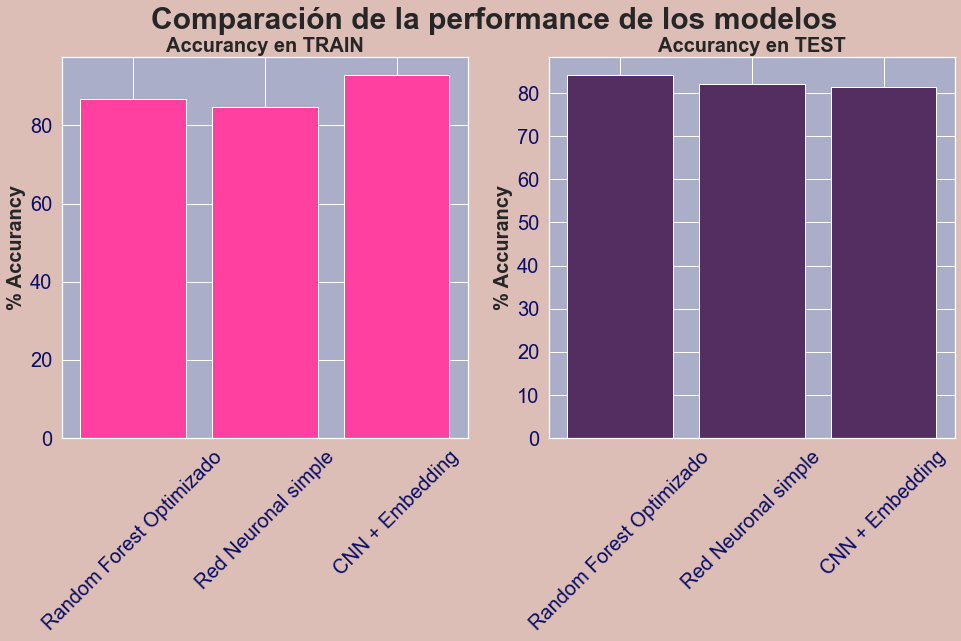

In [75]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize = (8*2,7))

spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

rect = fig.patch  # una instancia de rectángulo
rect.set_facecolor('#dcbeb7')


f_ax1 = fig.add_subplot(spec[0, 0])
f_ax1.bar(resultados.Modelo, resultados.Accurancy_TRAIN, facecolor ='#ff40a0')
rect = f_ax1.patch
rect.set_facecolor('#abaec9')

# Define títulos para la figura y la subtrama respectivamente
fig.suptitle('Comparación de la performance de los modelos', fontsize=30, fontweight='bold')
f_ax1.set_title('Accurancy en TRAIN', fontsize=20, fontweight='bold')
f_ax1.set_ylabel('% Accurancy', fontsize=20, fontweight='bold')


for label in f_ax1.yaxis.get_ticklabels():
    # label es una instancia de Text
    label.set_color('#0b0e65')
    label.set_rotation(0)
    label.set_fontsize(20)
                     
for label in f_ax1.xaxis.get_ticklabels():
    # label es una instancia de Text
    label.set_color('#0b0e65')
    label.set_rotation(45)
    label.set_fontsize(20)    

       
f_ax2 = fig.add_subplot(spec[0, 1])
f_ax2.bar(resultados.Modelo, resultados.Accurancy_TEST,facecolor ='#542d61')
rect = f_ax2.patch
rect.set_facecolor('#abaec9')
f_ax2.set_title('Accurancy en TEST',fontsize=20, fontweight='bold')
f_ax2.set_ylabel('% Accurancy', fontsize=20, fontweight='bold')

for label in f_ax2.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('#0b0e65')
    label.set_rotation(0)
    label.set_fontsize(20)


for label in f_ax2.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('#0b0e65')
    label.set_rotation(45)
    label.set_fontsize(20)



<font color=00777>

# 4 - Conclusiones

+ La diferencia de Accurancy entre TRAIN y TEST de cada modelo muestra que, los modelo de Random Forest Optimizado y Red Neuronal Simple funcionan bien porque los valores se acercan razonablemente. En el caso del modelo CNN + Embedding Layer la diferencia es de 11,32 % lo que muestra un sobreajuste que baja el rendimiento por la pérdida de generalización, aún con la menor cantidad de epochs.
+ El Accurancy de los modelos en TRAIN de Random Forest Optimizado (86.87%) y Red Neuronal simple(84.63%), no tienen una diferencia significativa entre sí,(aunque es superior el de Random Forest Optimizado),comparada con el valor logrado por el modelo de CNN + Embedding Layer(92.77).
+ El Accurancy de los modelos en TEST no tiene sustanciales diferencias, Random Forest Optimizado (84.11%), Red Neuronal Simple (82.08%), CNN + Embedding Layer (81.45%), aunque el mejor es Random Forest Optimizado.
+ Para la elección del mejor modelo,(descartando a CNN + Embedding Layer, por lo antedicho, y teniendo como opción los otros 2 modelos), se puede concluir:
    + La diferencia de Accurancy entre los 2 modelos es 2.03% a favor de Random Forest Optimizado
    + La interpretabilidad de Random Forest puede ser muy valiosa.
    + Si se comparan los tiempos de procesamiento, la de Red Neuronal Simple es asombrosa comparada con Random Forest Optimizado
        + Red Neuronal Simple 1 minuto 40 segundos.
        Se consideran el tiempo de 50 epochs ya que 500 epochs no mejorará su Accurancy
        + Random Forest Optimizado 1 hora 17 minutos
        sin considerar 20 horas para la optimización de hiperparámetros, ya que sin optimizar (83.94 %), sigue siendo superior a Red Neuronal simple (82.08%)

<font color=00777>

## CONCLUSIÓN FINAL: 

### El caso está dirigido al dataset de Amazon, la elección del mejor modelo sería distinta según la pregunta que se hace y la acción que se quiere realizar sobre los resultados.    
### Si se busca interpretabilidad, por ejemplo, analizando el impacto de una noticia en una red social o en un medio de comunicación, se necesitará usar Random Forest.
### Si se necesita velocidad con buen Accurancy, y se puede prescindir de la interpretabilidad ,como sería el caso de necesitar una acción rápida en relación al resultado encontrado, lo indicado sería Red Neuronal Simple.

<font color=00777>______________**Bibliografía**</font>
+ Deep Learning for Natural Language Processig - Develop Deep Learning Models for Natural Language in Python - Jason Brownlee